Set OBSGEO-B to   -25.281075 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611607203.410 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


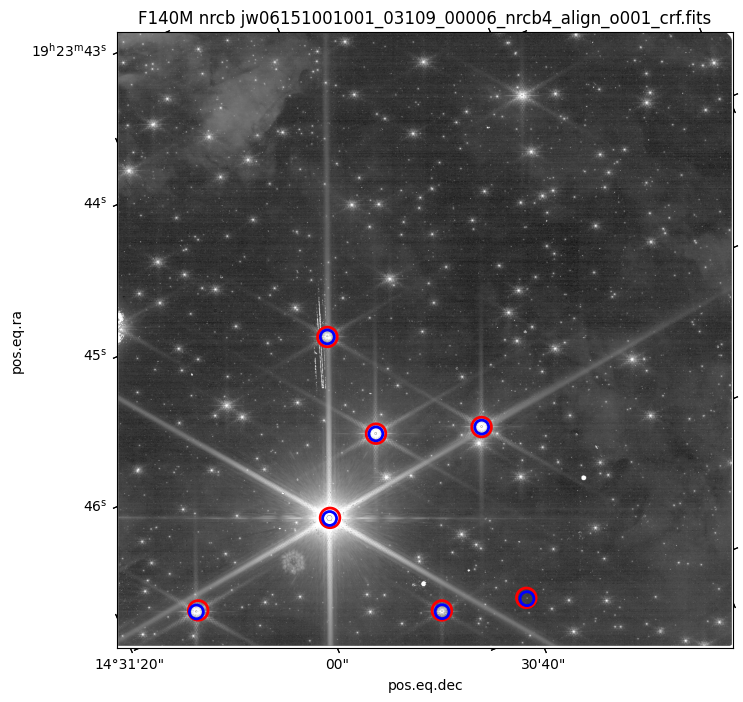

Set OBSGEO-B to   -25.284580 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611670344.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


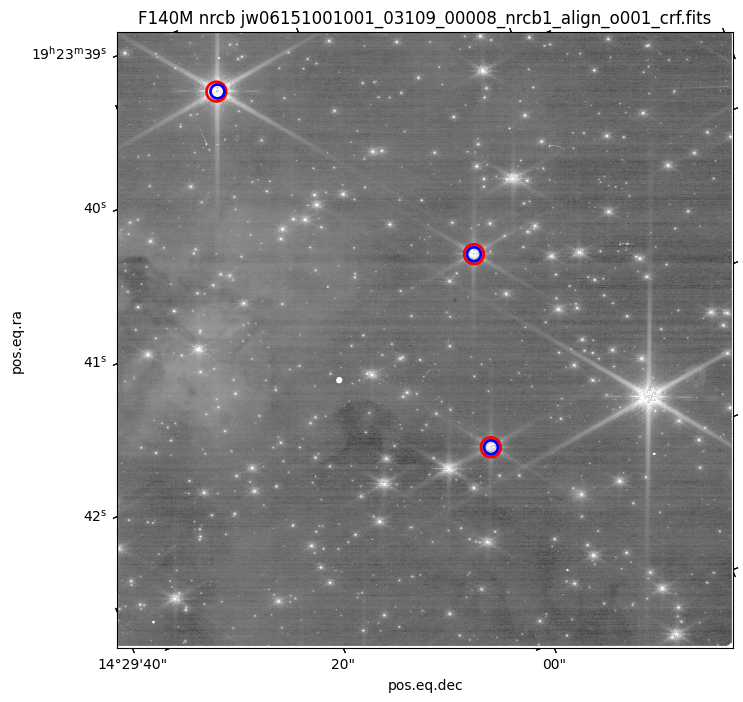

Set OBSGEO-B to   -25.276708 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611528526.261 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


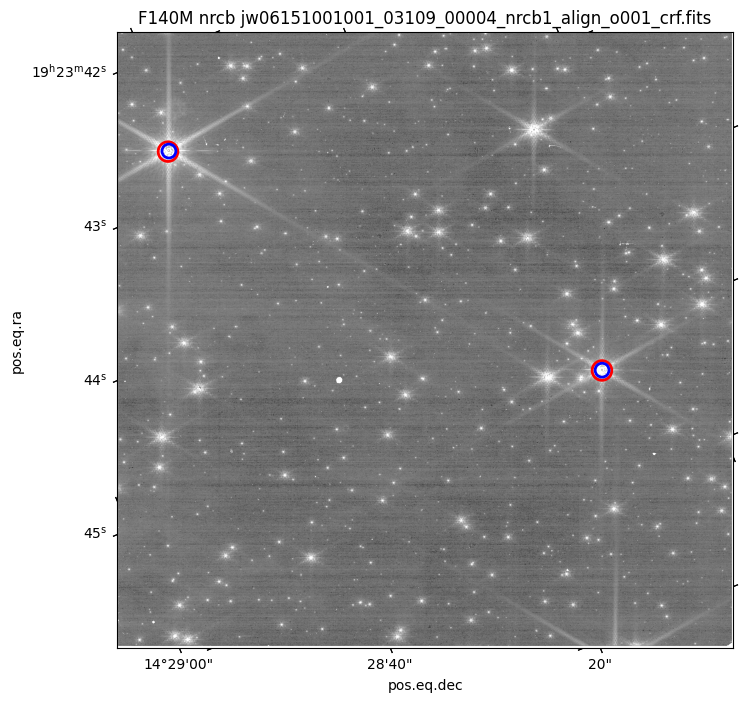

In [ ]:
import glob
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
filt = 'F140M'
if filt in ['F140M', 'F162M', 'F182M', 'F187N', 'F210M', 'F335M', 'F360M', 'F405N', 'F410M', 'F480M']:
    modules = ('nrca', 'nrcb')
else:
    modules = ('mirim',)
for module in modules:
    if filt in ['F140M', 'F162M', 'F182M', 'F187N', 'F210M', 'F335M', 'F360M', 'F405N', 'F410M', 'F480M']:
        globlist = glob.glob(f"/orange/adamginsburg/jwst/w51/{filt}/pipeline/*{module}*align*crf.fits")
    else:
        globlist = glob.glob(f"/orange/adamginsburg/jwst/w51/{filt}/pipeline/*mirimage_align_*_crf.fits")
ras = []
decs = []
for i, img_filename in enumerate(globlist):
    if i<=2:
        sat_star = img_filename.replace('.fits', '_satstar_catalog_newnewnewnew.fits')
        header_img = fits.getheader(img_filename, ext=('SCI', 1))
        wcs_img = WCS(header_img)
        cat_satstar = Table.read(sat_star)
        skycoord = cat_satstar['skycoord_fit']
        
        pixcoord = skycoord.to_pixel(wcs_img)
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection=wcs_img)
        img = fits.getdata(img_filename, ext=('SCI', 1))
        norm = simple_norm(img, 'log', percent=99.5)
        ax.imshow(img, origin='lower', cmap='gray', norm=norm)
        ax.scatter(pixcoord[0], pixcoord[1], s=200, edgecolor='red', facecolor='none', lw=2)
        ax.set_title(f"{filt} {module} {img_filename.split('/')[-1]}")
        
        plt.show()
